# Laboratorio de evaluación de modelos de aprendizaje supervisado

Realice los siguientes ejercicios para consolidar sus conocimientos y comprensión de la evaluación de modelos de aprendizaje supervisado.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Evaluación de modelos de regresión

In [2]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `MEDV` representa el valor medio de las viviendas ocupadas por sus propietarios (en miles de dólares) y es la variable objetivo que queremos predecir.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [4]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size = 0.8,
                                        random_state = 42
                                    )

## 2. Entrene un modelo `LinearRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [5]:
# Creación del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción Train
y_train_pred = modelo.predict(X_train)
# Predicción test
y_test_pred = modelo.predict(X_test)

## 3. Calcule e imprima R-cuadrado tanto para el conjunto de entrenamiento como para el de prueba.

In [6]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 (Train): {r2_train}')
print(f'R^2 (Test): {r2_test}')

R^2 (Train): 0.6125511913966952
R^2 (Test): 0.5757877060324511


## 4. Calcule e imprima el error cuadrático medio para el conjunto de entrenamiento y de prueba.

In [7]:
# Your code here
# Evaluación del modelo
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

MSE (train): 0.5179331255246699
MSE (test): 0.555891598695244


## 5. Calcule e imprima el error medio absoluto para el conjunto de entrenamiento y de prueba.

In [8]:
# Your code here
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')

MAE (train): 0.5286283596581934
MAE (test): 0.5332001304956564


## Evaluación del modelo de clasificación

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

data = load_iris()


X_c = pd.DataFrame(data["data"], columns=data["feature_names"])
y_c = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X_c, y_c], axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Divida este conjunto de datos en conjuntos de train (80%) y de test (20%).

El campo `class` representa el tipo de flor y es la variable objetivo que querremos predecir.

In [10]:
# División de los datos en train y test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
                                        X_c,
                                        y_c,
                                        train_size = 0.8,
                                        random_state = 42
                                    )

## 7. Entrene un modelo `LogisticRegression` en este conjunto de datos y genere predicciones tanto en el conjunto de entrenamiento como en el de prueba.

In [11]:
# Crear el modelo de regresión logística
modelo_c = LogisticRegression(solver='lbfgs', max_iter=1000)

# Entrenar el modelo
modelo_c.fit(X_train_c, y_train_c)

# Predicción Train
y_train_pred_c = modelo_c.predict(X_train_c)

# Predicción test
y_test_pred_c = modelo_c.predict(X_test_c)

## 8. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de pruebas.

    Esta función resuelve los ejercicios 8,9,10,11,12 y 13.

In [12]:
# Calcular las métricas
accuracy_train = accuracy_score(y_train_c, y_train_pred_c)
accuracy_test = accuracy_score(y_test_c, y_test_pred_c)

balanced_accuracy_train = balanced_accuracy_score(y_train_c, y_train_pred_c)
balanced_accuracy_test = balanced_accuracy_score(y_test_c, y_test_pred_c)

precision_train = precision_score(y_train_c, y_train_pred_c, average='weighted')
precision_test = precision_score(y_test_c, y_test_pred_c, average='weighted')

recall_train = recall_score(y_train_c, y_train_pred_c, average='weighted')
recall_test = recall_score(y_test_c, y_test_pred_c, average='weighted')

f1_train = f1_score(y_train_c, y_train_pred_c, average='weighted')
f1_test = f1_score(y_test_c, y_test_pred_c, average='weighted')

print(f'Accuracy (train): {accuracy_train}')
print(f'Accuracy (test): {accuracy_test}')

Accuracy (train): 0.975
Accuracy (test): 1.0


## 9. Calcule e imprima la puntuación de precisión equilibrada tanto para el conjunto de entrenamiento como para el de pruebas.

In [13]:
# Your code here
print(f'Balanced Accuracy (train): {balanced_accuracy_train}')
print(f'Balanced Accuracy (test): {balanced_accuracy_test}')

Balanced Accuracy (train): 0.975609756097561
Balanced Accuracy (test): 1.0


## 10. Calcule e imprima la puntuación de precisión tanto para el conjunto de entrenamiento como para el de prueba.

In [14]:
# Your code here
print(f'Precision (train): {precision_train}')
print(f'Precision (test): {precision_test}')

Precision (train): 0.9767857142857144
Precision (test): 1.0


## 11. Calcule e imprima la puntuación de recuerdo tanto para el conjunto de entrenamiento como para el de prueba.

In [15]:
# Your code here
print(f'Recall (train): {recall_train}')
print(f'Recall (test): {recall_test}')

Recall (train): 0.975
Recall (test): 1.0


## 12. Calcule e imprima la puntuación F1 tanto para el conjunto de entrenamiento como para el de prueba.

In [16]:
# Your code here
print(f'F1 Score (train): {f1_train}')
print(f'F1 Score (test): {f1_test}')

F1 Score (train): 0.9749882794186592
F1 Score (test): 1.0


## 13. Generar matrices de confusión tanto para el conjunto de entrenamiento como para el de pruebas.

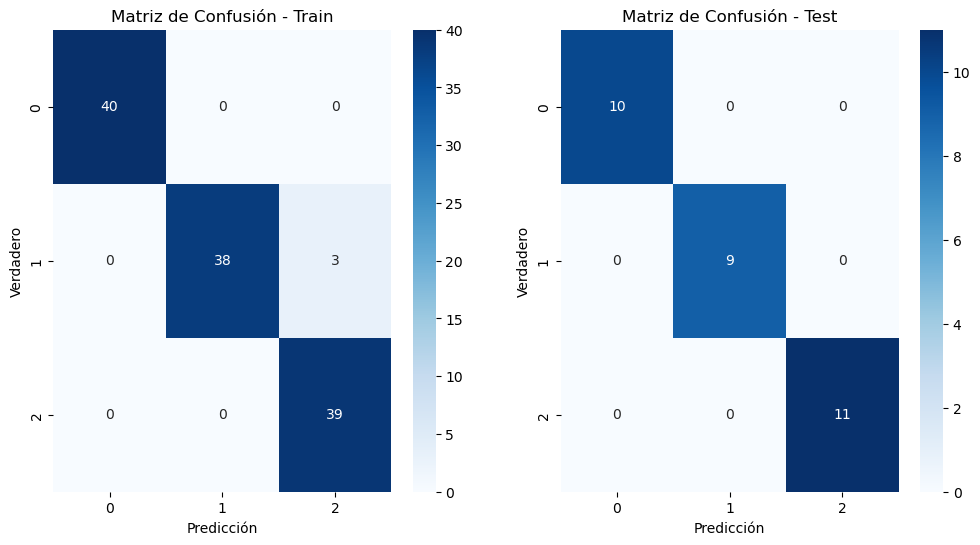

In [17]:
# Your code here
# Generar matrices de confusión
conf_matrix_train = confusion_matrix(y_train_c, y_train_pred_c)
conf_matrix_test = confusion_matrix(y_test_c, y_test_pred_c)

# Visualizar matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusión - Train')
ax[0].set_xlabel('Predicción')
ax[0].set_ylabel('Verdadero')

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusión - Test')
ax[1].set_xlabel('Predicción')
ax[1].set_ylabel('Verdadero')

plt.show()

## Bonus: Para cada uno de los conjuntos de datos de este laboratorio, intente entrenar con algunos de los otros modelos que ha aprendido, vuelva a calcular las métricas de evaluación y compare para determinar qué modelos funcionan mejor en cada conjunto de datos.

In [18]:
# Your code here